
# Shot freeze frame

This example shows how to plot a shot freeze frame.


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install mplsoccer
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

from mplsoccer import VerticalPitch, FontManager, Sbopen

plt.style.use('ggplot')

# get event and lineup dataframes for game 3773372
# event data
parser = Sbopen()
df_event, df_related, df_freeze, df_tactics = parser.event(3773372)

# lineup data
df_lineup = parser.lineup(3773372)
df_lineup = df_lineup[['player_id', 'jersey_number', 'team_name']].copy()

Subset a shot



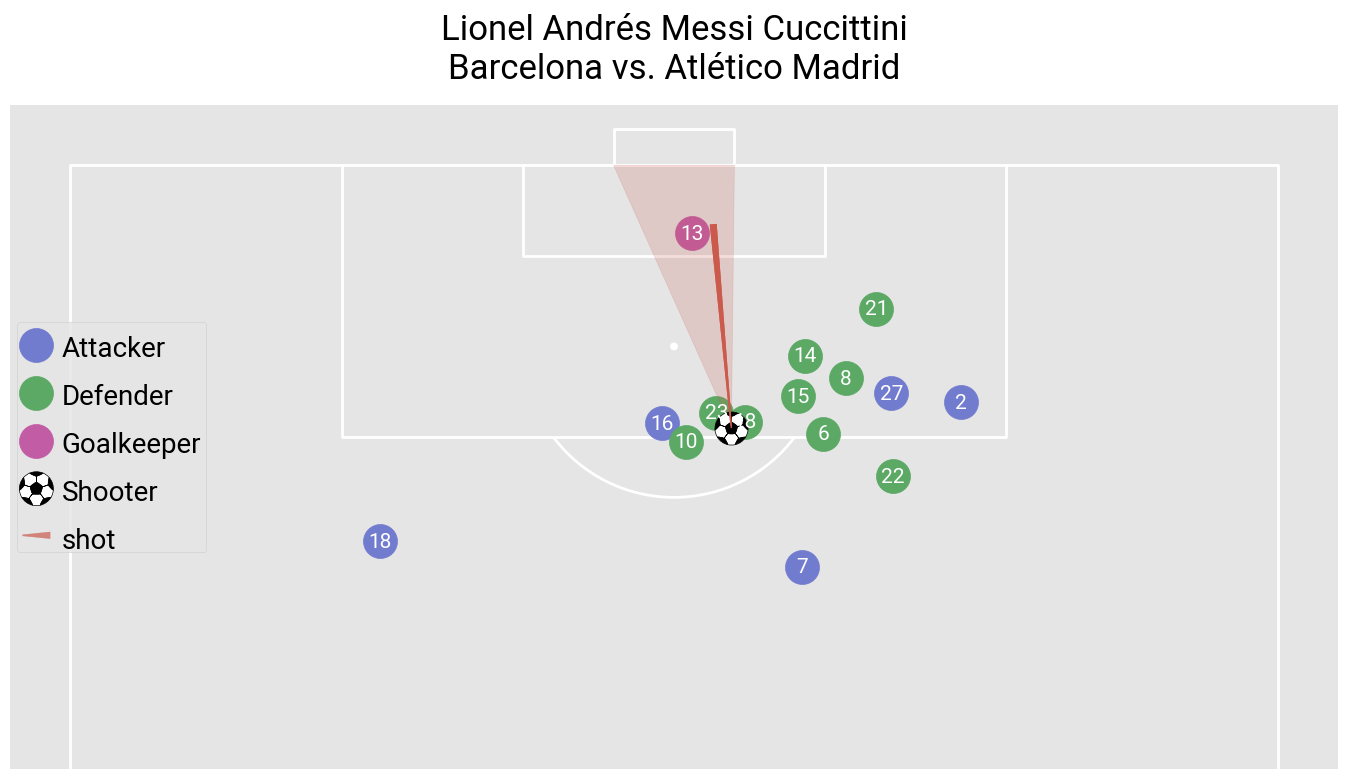

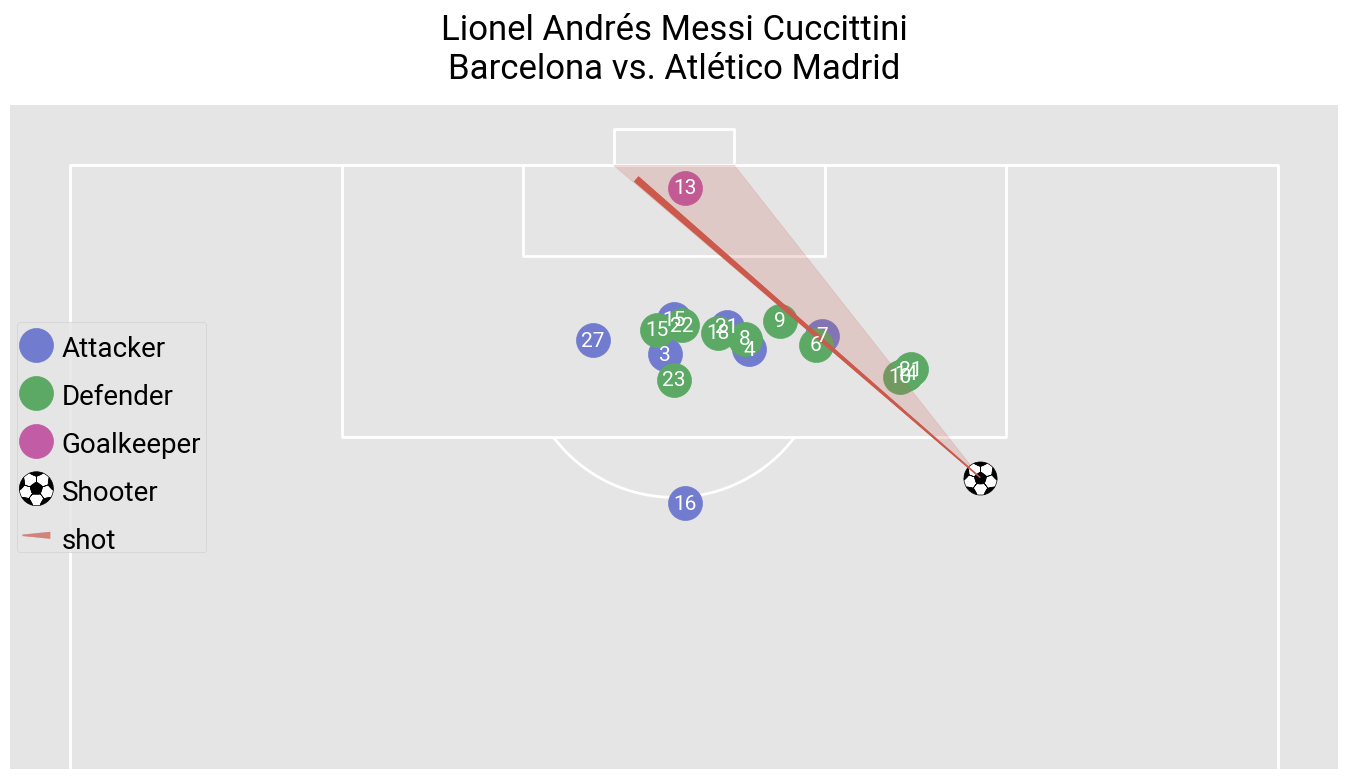

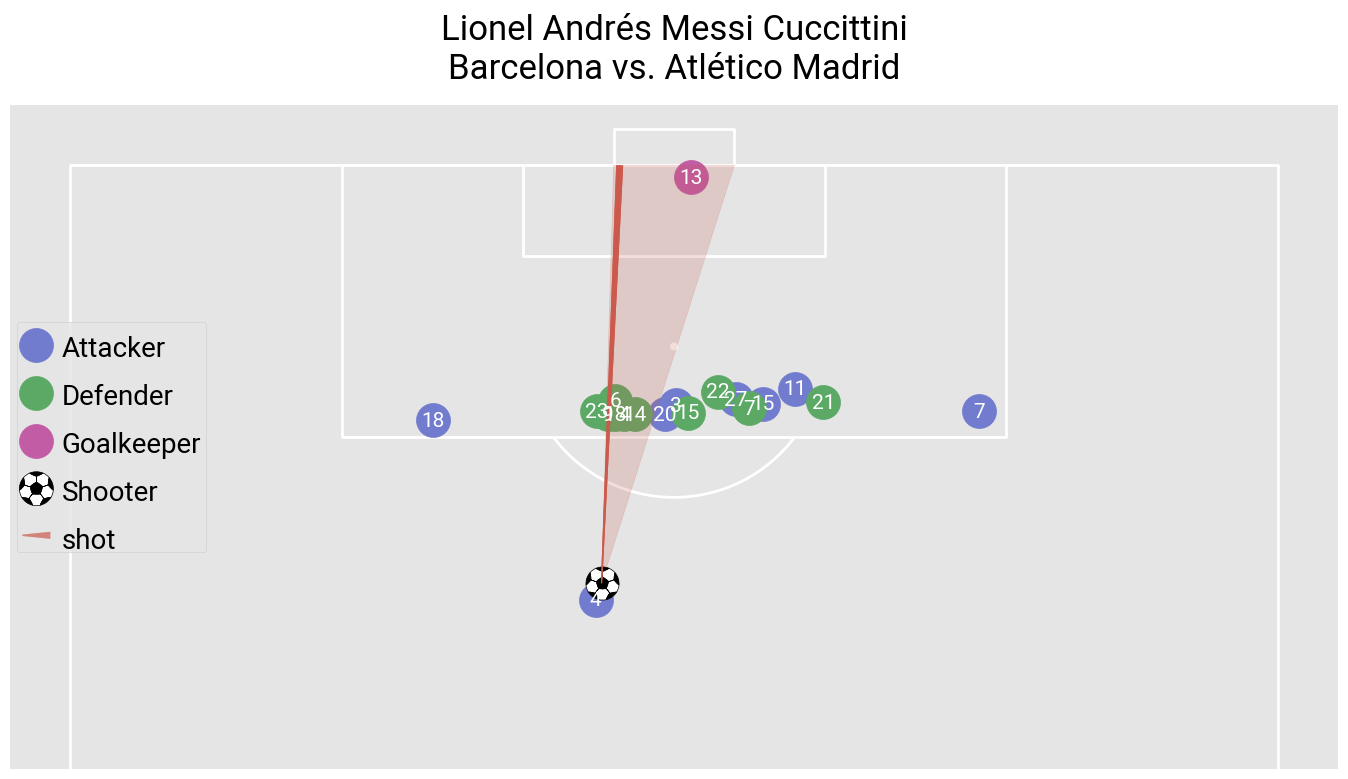

In [ ]:
SHOT_IDs = ['95af8614-9fc0-4157-98e3-badb21379d28', 'c929497f-32cd-4198-9bb6-5fbe960e052f', 'aa155c5a-319c-4010-97c2-6c809184c0f4']

SHOT_ID = '95af8614-9fc0-4157-98e3-badb21379d28'
for sh in SHOT_IDs:
  SHOT_ID = sh
  df_freeze_frame = df_freeze[df_freeze.id == SHOT_ID].copy()
  df_shot_event = df_event[df_event.id == SHOT_ID].dropna(axis=1, how='all').copy()

  # add the jersey number
  df_freeze_frame = df_freeze_frame.merge(df_lineup, how='left', on='player_id')

  # *Subset* the teams

  # strings for team names
  team1 = df_shot_event.team_name.iloc[0]
  team2 = list(set(df_event.team_name.unique()) - {team1})[0]

  # subset the team shooting, and the opposition (goalkeeper/ other)
  df_team1 = df_freeze_frame[df_freeze_frame.team_name == team1]
  df_team2_goal = df_freeze_frame[(df_freeze_frame.team_name == team2) &
                                  (df_freeze_frame.position_name == 'Goalkeeper')]
  df_team2_other = df_freeze_frame[(df_freeze_frame.team_name == team2) &
                                  (df_freeze_frame.position_name != 'Goalkeeper')]

  # Plotting

  # Setup the pitch
  pitch = VerticalPitch(half=True, goal_type='box', pad_bottom=-20)

  # We will use mplsoccer's grid function to plot a pitch with a title axis.
  fig, axs = pitch.grid(figheight=8, endnote_height=0,  # no endnote
                        title_height=0.1, title_space=0.02,
                        # Turn off the endnote/title axis. I usually do this after
                        # I am happy with the chart layout and text placement
                        axis=False,
                        grid_height=0.83)

  # Plot the players
  sc1 = pitch.scatter(df_team1.x, df_team1.y, s=600, c='#727cce', label='Attacker', ax=axs['pitch'])
  sc2 = pitch.scatter(df_team2_other.x, df_team2_other.y, s=600,
                      c='#5ba965', label='Defender', ax=axs['pitch'])
  sc4 = pitch.scatter(df_team2_goal.x, df_team2_goal.y, s=600,
                      ax=axs['pitch'], c='#c15ca5', label='Goalkeeper')

  # plot the shot
  sc3 = pitch.scatter(df_shot_event.x, df_shot_event.y, marker='football',
                      s=600, ax=axs['pitch'], label='Shooter', zorder=1.2)
  line = pitch.lines(df_shot_event.x, df_shot_event.y,
                    df_shot_event.end_x, df_shot_event.end_y, comet=True,
                    label='shot', color='#cb5a4c', ax=axs['pitch'])

  # plot the angle to the goal
  pitch.goal_angle(df_shot_event.x, df_shot_event.y, ax=axs['pitch'], alpha=0.2, zorder=1.1,
                  color='#cb5a4c', goal='right')

  # fontmanager for google font (robotto)
  robotto_regular = FontManager()

  # plot the jersey numbers
  for i, label in enumerate(df_freeze_frame.jersey_number):
      pitch.annotate(label, (df_freeze_frame.x[i], df_freeze_frame.y[i]),
                    va='center', ha='center', color='white',
                    fontproperties=robotto_regular.prop, fontsize=15, ax=axs['pitch'])

  # add a legend and title
  legend = axs['pitch'].legend(loc='center left', labelspacing=1.5)
  for text in legend.get_texts():
      text.set_fontproperties(robotto_regular.prop)
      text.set_fontsize(20)
      text.set_va('center')

  # title
  axs['title'].text(0.5, 0.5, f'{df_shot_event.player_name.iloc[0]}\n{team1} vs. {team2}',
                    va='center', ha='center', color='black',
                    fontproperties=robotto_regular.prop, fontsize=25)

  plt.show()  # If you are using a Jupyter notebook you do not need this line

In [ ]:
"""
{
  "id" : "95af8614-9fc0-4157-98e3-badb21379d28",
  "index" : 1700,
  "period" : 1,
  "timestamp" : "00:40:46.916",
  "minute" : 40,
  "second" : 46,
  "type" : {
    "id" : 16,
    "name" : "Shot"
  },
  "possession" : 114,
  "possession_team" : {
    "id" : 217,
    "name" : "Barcelona"
  },
  "play_pattern" : {
    "id" : 1,
    "name" : "Regular Play"
  },
  "team" : {
    "id" : 217,
    "name" : "Barcelona"
  },
  "player" : {
    "id" : 5503,
    "name" : "Lionel Andrés Messi Cuccittini"
  },
  "position" : {
    "id" : 22,
    "name" : "Right Center Forward"
  },
  "location" : [ 102.6, 43.8 ],
  "duration" : 0.534467,
  "under_pressure" : true,
  "related_events" : [ "b189a01b-6dca-41a6-96ea-bc8c58ad3fbe", "d933d2b8-0355-45b7-8fa4-d49c4f185f45" ],
  "shot" : {
    "statsbomb_xg" : 0.11183241,
    "end_location" : [ 116.1, 42.6, 1.6 ],
    "key_pass_id" : "a0b08f15-a38c-400a-96e8-cd0f6d794f2b",
    "technique" : {
      "id" : 93,
      "name" : "Normal"
    },
    "outcome" : {
      "id" : 100,
      "name" : "Saved"
    },
    "type" : {
      "id" : 87,
      "name" : "Open Play"
    },
    "body_part" : {
      "id" : 38,
      "name" : "Left Foot"
    },
    "freeze_frame" : [ {
      "location" : [ 95.1, 20.5 ],
      "player" : {
        "id" : 5211,
        "name" : "Jordi Alba Ramos"
      },
      "position" : {
        "id" : 8,
        "name" : "Left Wing Back"
      },
      "teammate" : true
    }, {
      "location" : [ 93.4, 48.5 ],
      "player" : {
        "id" : 5487,
        "name" : "Antoine Griezmann"
      },
      "position" : {
        "id" : 24,
        "name" : "Left Center Forward"
      },
      "teammate" : true
    }, {
      "location" : [ 102.9, 39.2 ],
      "player" : {
        "id" : 30486,
        "name" : "Pedro González López"
      },
      "position" : {
        "id" : 15,
        "name" : "Left Center Midfield"
      },
      "teammate" : true
    }, {
      "location" : [ 104.9, 54.4 ],
      "player" : {
        "id" : 39073,
        "name" : "Moriba Kourouma Kourouma"
      },
      "position" : {
        "id" : 10,
        "name" : "Center Defensive Midfield"
      },
      "teammate" : true
    }, {
      "location" : [ 104.3, 59.0 ],
      "player" : {
        "id" : 21881,
        "name" : "Sergino Dest"
      },
      "position" : {
        "id" : 7,
        "name" : "Right Wing Back"
      },
      "teammate" : true
    }, {
      "location" : [ 101.7, 40.8 ],
      "player" : {
        "id" : 6377,
        "name" : "Ángel Martín Correa"
      },
      "position" : {
        "id" : 17,
        "name" : "Right Wing"
      },
      "teammate" : false
    }, {
      "location" : [ 103.6, 42.8 ],
      "player" : {
        "id" : 3308,
        "name" : "Kieran Trippier"
      },
      "position" : {
        "id" : 7,
        "name" : "Right Wing Back"
      },
      "teammate" : false
    }, {
      "location" : [ 103.0, 44.7 ],
      "player" : {
        "id" : 11167,
        "name" : "Felipe Augusto de Almeida Monteiro"
      },
      "position" : {
        "id" : 4,
        "name" : "Center Back"
      },
      "teammate" : false
    }, {
      "location" : [ 99.4, 54.5 ],
      "player" : {
        "id" : 6790,
        "name" : "Mario Hermoso Canseco"
      },
      "position" : {
        "id" : 5,
        "name" : "Left Center Back"
      },
      "teammate" : false
    }, {
      "location" : [ 102.2, 49.9 ],
      "player" : {
        "id" : 5199,
        "name" : "Jorge Resurrección Merodio"
      },
      "position" : {
        "id" : 11,
        "name" : "Left Defensive Midfield"
      },
      "teammate" : false
    }, {
      "location" : [ 104.7, 48.2 ],
      "player" : {
        "id" : 6376,
        "name" : "Stefan Savić"
      },
      "position" : {
        "id" : 3,
        "name" : "Right Center Back"
      },
      "teammate" : false
    }, {
      "location" : [ 107.4, 48.7 ],
      "player" : {
        "id" : 6840,
        "name" : "Marcos Llorente Moreno"
      },
      "position" : {
        "id" : 9,
        "name" : "Right Defensive Midfield"
      },
      "teammate" : false
    }, {
      "location" : [ 105.9, 51.4 ],
      "player" : {
        "id" : 6381,
        "name" : "Saúl Ñíguez Esclapez"
      },
      "position" : {
        "id" : 21,
        "name" : "Left Wing"
      },
      "teammate" : false
    }, {
      "location" : [ 110.5, 53.4 ],
      "player" : {
        "id" : 5633,
        "name" : "Yannick Ferreira Carrasco"
      },
      "position" : {
        "id" : 8,
        "name" : "Left Wing Back"
      },
      "teammate" : false
    }, {
      "location" : [ 115.5, 41.2 ],
      "player" : {
        "id" : 6378,
        "name" : "Jan Oblak"
      },
      "position" : {
        "id" : 1,
        "name" : "Goalkeeper"
      },
      "teammate" : false
    } ]
  }
}
"""

'\n{\n  "id" : "95af8614-9fc0-4157-98e3-badb21379d28",\n  "index" : 1700,\n  "period" : 1,\n  "timestamp" : "00:40:46.916",\n  "minute" : 40,\n  "second" : 46,\n  "type" : {\n    "id" : 16,\n    "name" : "Shot"\n  },\n  "possession" : 114,\n  "possession_team" : {\n    "id" : 217,\n    "name" : "Barcelona"\n  },\n  "play_pattern" : {\n    "id" : 1,\n    "name" : "Regular Play"\n  },\n  "team" : {\n    "id" : 217,\n    "name" : "Barcelona"\n  },\n  "player" : {\n    "id" : 5503,\n    "name" : "Lionel Andrés Messi Cuccittini"\n  },\n  "position" : {\n    "id" : 22,\n    "name" : "Right Center Forward"\n  },\n  "location" : [ 102.6, 43.8 ],\n  "duration" : 0.534467,\n  "under_pressure" : true,\n  "related_events" : [ "b189a01b-6dca-41a6-96ea-bc8c58ad3fbe", "d933d2b8-0355-45b7-8fa4-d49c4f185f45" ],\n  "shot" : {\n    "statsbomb_xg" : 0.11183241,\n    "end_location" : [ 116.1, 42.6, 1.6 ],\n    "key_pass_id" : "a0b08f15-a38c-400a-96e8-cd0f6d794f2b",\n    "technique" : {\n      "id" : 93,\n 